# Nvision Quickstart

In [8]:
import os
import json
import base64
from nvision import ObjectDetection

## Initialize service

In [9]:
model = ObjectDetection(api_key=os.getenv('API_KEY'))

## Base64 encoded string

In [10]:
with open(os.path.join('docs', 'street.jpg'), 'rb') as file:
    image = file.read()
    image = base64.b64encode(image).decode('utf-8')

## Make a RESTful call to the Nvision API

In [11]:
%%time
response = model.predict(
    image,
    confidence_threshold=0.5,
    output_cropped_image=False,
    output_visualized_image=True
)

CPU times: user 43.8 ms, sys: 8.48 ms, total: 52.3 ms
Wall time: 879 ms


In [12]:
response = response.json()
predictions = response['detected_objects']
print(json.dumps(predictions, indent=4, sort_keys=True))

[
    {
        "bounding_box": {
            "bottom": 605,
            "left": 246,
            "right": 302,
            "top": 520
        },
        "confidence": 0.8367999792098999,
        "name": "backpack",
        "parent": "accessory"
    },
    {
        "bounding_box": {
            "bottom": 230,
            "left": 595,
            "right": 641,
            "top": 63
        },
        "confidence": 0.6226999759674072,
        "name": "traffic light",
        "parent": "object"
    },
    {
        "bounding_box": {
            "bottom": 354,
            "left": 969,
            "right": 1012,
            "top": 269
        },
        "confidence": 0.6881999969482422,
        "name": "traffic light",
        "parent": "object"
    },
    {
        "bounding_box": {
            "bottom": 250,
            "left": 655,
            "right": 731,
            "top": 87
        },
        "confidence": 0.8288999795913696,
        "name": "traffic light",
        "parent": "obje

## Visualize predictions

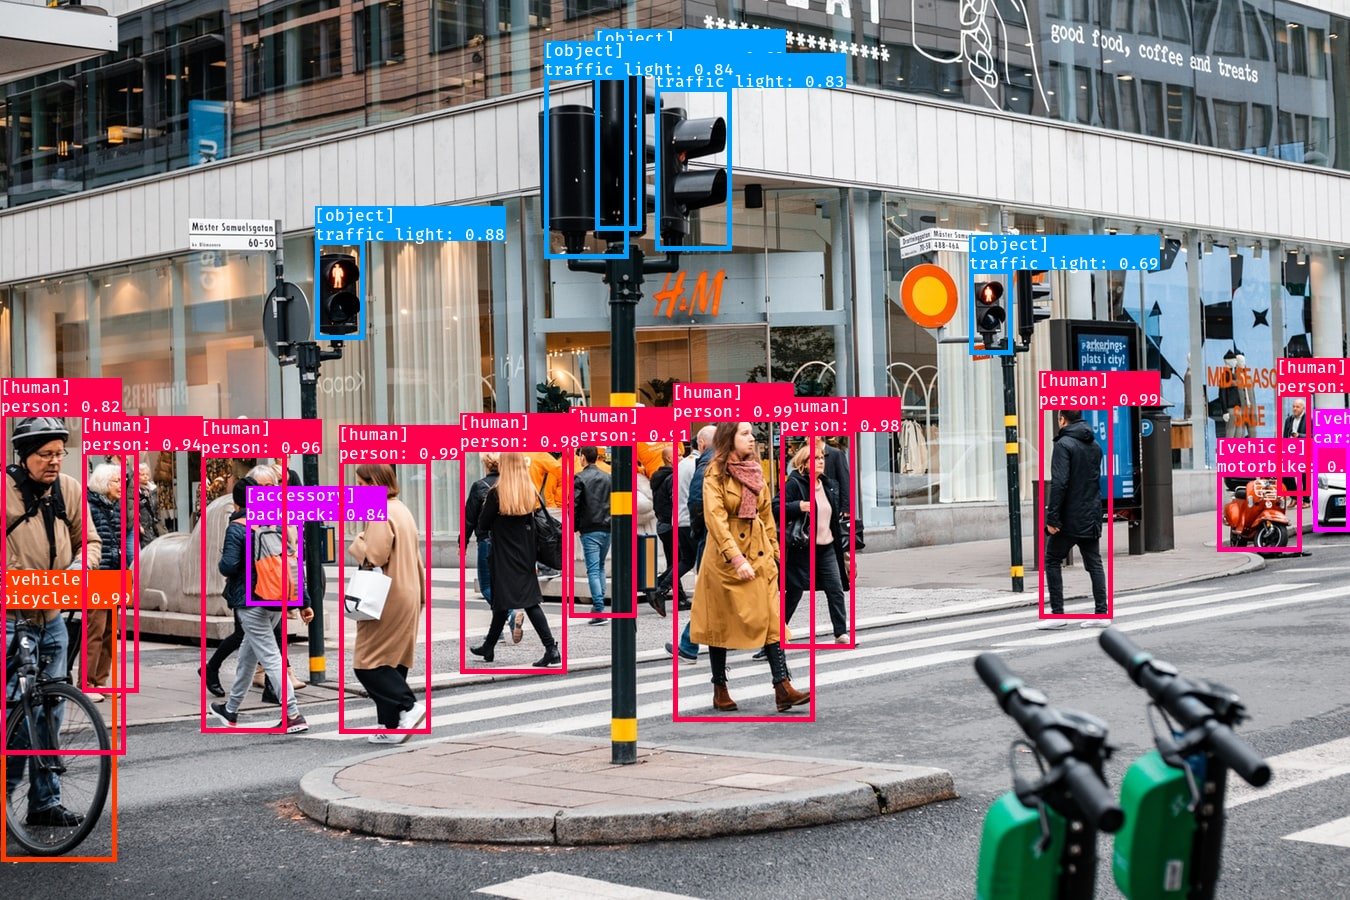

In [13]:
import cv2
import numpy as np
from PIL import Image

def decode_b64_to_image_array(image_base64):
    image_buffer = base64.b64decode(image_base64)
    image_array  = np.frombuffer(image_buffer, dtype='uint8')
    image_array = cv2.imdecode(image_array, cv2.IMREAD_UNCHANGED)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    return image_array

image_array = decode_b64_to_image_array(response['raw_data'])
Image.fromarray(image_array)